In [1]:
import pandas as pd
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt
from statistics import mean
import math
from math import log


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

In [3]:
pkl_file = open('myfile.pkl', 'rb')
mydata = pickle.load(pkl_file)
#pkl_file.close()

In [6]:
(mydata['ch0'])
#mydata


array([[1535, 1541, 1545, ..., 1548, 1551, 1545],
       [1534, 1539, 1538, ..., 1526, 1540, 1535],
       [1534, 1537, 1539, ..., 1499, 1492, 1495],
       ...,
       [1536, 1534, 1533, ..., 1539, 1539, 1535],
       [1534, 1537, 1532, ..., 1532, 1540, 1537],
       [1536, 1537, 1542, ..., 1537, 1542, 1531]])

In [32]:
baseline=np.average((mydata['ch0'][0,:250]))
baseline

1537.916

In [33]:
epoc=np.std((mydata['ch0'][0,:250]))
epoc

4.4529702446793875

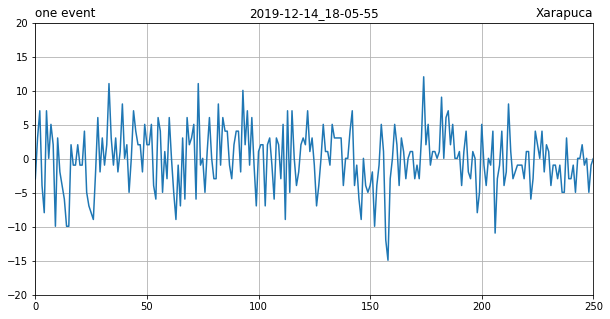

In [34]:
data=(mydata['ch0'][0]-baseline)
plt.plot((data))
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
#plt.yscale('log')
plt.grid(True)
t = np.arange(len(data))
plt.xlim(0, 250)
plt.ylim(-20, 20)
plt.show()

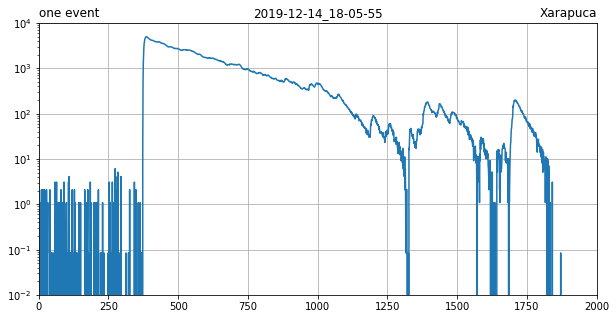

In [23]:
data=(mydata['ch1'][0]-baseline)
#plt.plot((data))
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
plt.yscale('log')
plt.grid(True)
t = np.arange(len(data))
plt.xlim(0, 2000)
plt.ylim(0.01, 10000)
plt.plot(t,data)
plt.show()

In [25]:
avrg=np.average(data)
avrg

542.968

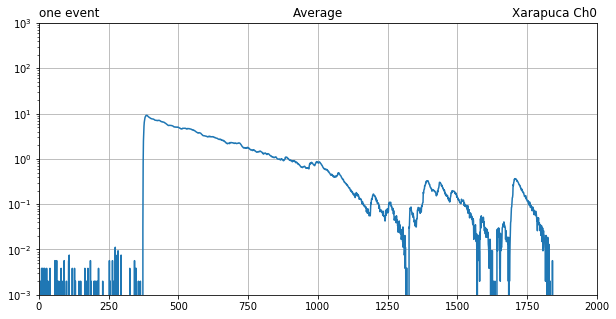

In [26]:
plt.plot(data/avrg)
plt.title('Average')
plt.title('one event', loc='left')
plt.title('Xarapuca Ch0', loc='right')
plt.grid(True)
plt.yscale('log')
plt.xlim(0, 2000)
plt.ylim(0.001, 1000)
plt.show()

In [11]:
from IPython.display import Image

## fit
    coeffs[0] is B (noise)
    coeffs[1] is A (amplitude)
    coeffs[2] is \mu (center)
    coeffs[3] is \sigma (width)
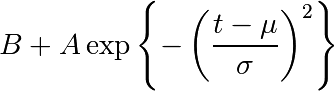
x0 = np.array([3, 30, 15, 1], dtype=float)

In [12]:
def model(t, coeffs):
    return coeffs[0] + coeffs[1] * np.exp( - ((t-coeffs[2])/coeffs[3])**2 )



In [13]:
x0 = np.array([1, 10, 750, 1], dtype=float)

In [14]:
def residuals(coeffs, y, t):
    return y - model(t, coeffs)


In [15]:
from scipy.optimize import leastsq
x, flag = leastsq(residuals, x0, args=(data/avrg, t))
print (x)

[2.49480025e-01 5.83619565e+00 4.86861770e+02 1.45106849e+02]


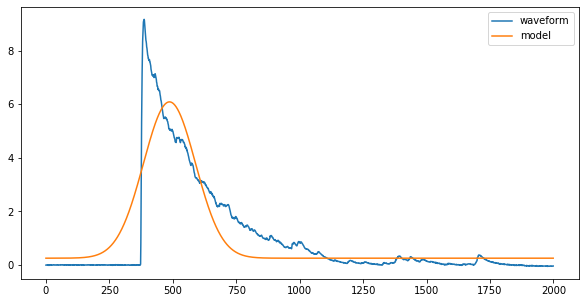

In [16]:
plt.plot(t, data/avrg, t, model(t, x)) 
plt.legend(['waveform', 'model']) 
plt.show() 

In [17]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [18]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

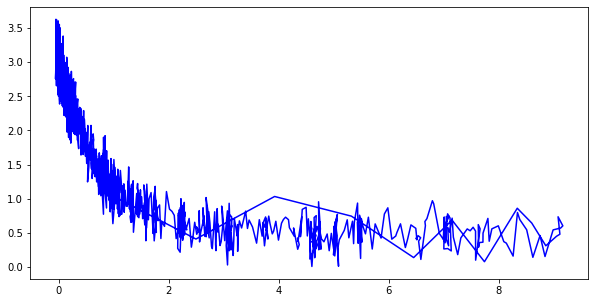

In [19]:
xdata = data/avrg
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')


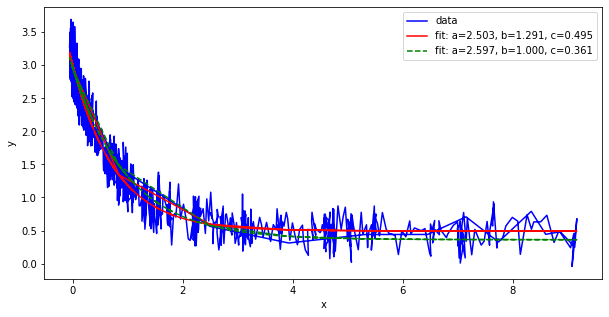

In [20]:
xdata = data/avrg
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
#popt
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [226]:
popt

array([2.4974319 , 1.30341516, 0.50007742])

In [40]:
from scipy.signal import find_peaks
peaks,_=find_peaks(data,height=0)
peaks

array([ 439,  442,  446,  451,  454,  464,  519,  532,  535,  540,  543,
        548,  551,  556,  558,  563,  565,  568,  571,  583,  586,  588,
        593,  596,  601,  604,  606,  609,  611,  621,  626,  628,  631,
        634,  639,  641,  643,  650,  653,  656,  660,  664,  668,  856,
       1512])

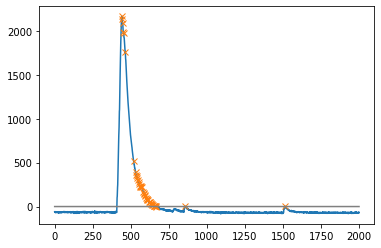

In [41]:
%matplotlib inline
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(np.zeros_like(data),"-",color="gray")
plt.show()

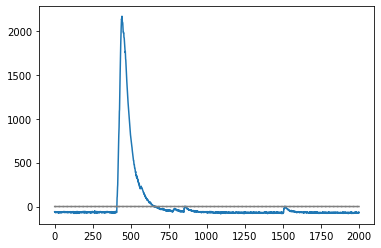

In [43]:


border=np.sin(np.linspace(0,3*np.pi,data.size))
peaks,_=find_peaks(data,height=[border,-border])
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(border,"-",color="gray")
plt.plot(-border,":",color="gray")
plt.show()



In [44]:
peaks,_=find_peaks(data,distance=150)
np.diff(peaks)
print(peaks)

[  60  263  442  593  856 1019 1188 1342 1512 1681 1981]


In [45]:
from scipy.signal import peak_prominences
peaks_all,_=find_peaks(data)
prominences,left_base,right_base=peak_prominences(data,peaks_all)
print(prominences)

[1.000e+00 7.000e+00 5.000e+00 1.000e+00 1.000e+01 6.000e+00 1.000e+01
 9.000e+00 1.100e+01 6.000e+00 1.000e+00 1.100e+01 1.000e+00 6.000e+00
 2.000e+00 5.000e+00 1.000e+00 5.000e+00 4.000e+00 2.000e+01 7.000e+00
 1.100e+01 8.000e+00 4.000e+00 1.000e+00 4.000e+00 1.200e+01 1.200e+01
 3.000e+00 6.000e+00 2.000e+00 1.400e+01 1.000e+01 4.000e+00 1.000e+01
 6.000e+00 9.000e+00 1.600e+01 6.000e+00 2.000e+00 5.000e+00 1.900e+01
 1.200e+01 5.000e+00 8.000e+00 2.000e+01 6.000e+00 1.100e+01 1.000e+00
 1.300e+01 5.000e+00 4.000e+00 8.000e+00 7.000e+00 8.000e+00 1.200e+01
 9.000e+00 1.100e+01 5.000e+00 2.000e+01 9.000e+00 2.100e+01 8.000e+00
 1.000e+01 5.000e+00 1.000e+00 1.200e+01 4.000e+00 4.000e+00 8.000e+00
 8.000e+00 1.400e+01 5.000e+00 5.000e+00 5.000e+00 1.500e+01 6.000e+00
 5.000e+00 1.800e+01 7.000e+00 8.000e+00 8.000e+00 1.300e+01 2.600e+01
 1.700e+01 1.000e+01 1.000e+01 1.500e+01 2.000e+00 1.600e+01 1.100e+01
 7.000e+00 1.300e+01 1.300e+01 7.000e+00 1.600e+01 1.600e+01 6.000e+00
 1.000

In [46]:
#https://github.com/mjDelta/scipy.signal-Study-Records
from sklearn.cluster import KMeans
clf=KMeans(n_clusters=2).fit(np.expand_dims(prominences,1))
y=clf.predict(np.expand_dims(prominences,1))
print(set(y))
centers=clf.cluster_centers_
print(centers)

{0, 1}
[[   7.33722871]
 [2246.        ]]


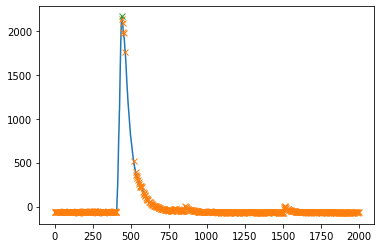

In [47]:
plt.plot(data)
plt.plot(peaks_all[y==False],data[peaks_all[y==False]],"x")
plt.plot(peaks_all[y==True],data[peaks_all[y==True]],"x")
plt.show()

In [ ]:
border=np.sin(np.linspace(0,3*np.pi,data.size))
peaks,_=find_peaks(data,height=[border,-border])
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(border,"-",color="gray")
plt.plot(-border,":",color="gray")
plt.show()

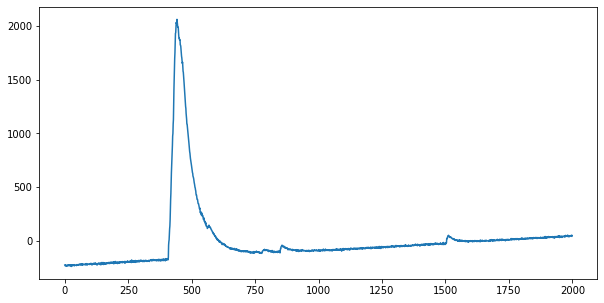

In [20]:
from scipy import signal
x_detrended = signal.detrend(sig)
plt.plot(x_detrended)

In [ ]:
peak_freq = sample_freq[power.argmax()]
peak_freq

In [11]:
sig.mean()

26.417

In [12]:
a = np.ma.array([1., 2., 3., 4.], mask=[False, False, True, True])

In [13]:
a = np.ma.array([1., 2., 3., 4.], mask=[False, False, True, True])

x = np.ma.arange(6.).reshape(3, 2)

In [14]:
x

masked_array(
  data=[[0., 1.],
        [2., 3.],
        [4., 5.]],
  mask=False,
  fill_value=1e+20)

In [15]:
avg, sumweights = np.ma.average(x, axis=0, weights=[1, 2, 3],returned=True)

In [16]:
avg

masked_array(data=[2.6666666666666665, 3.6666666666666665],
             mask=[False, False],
       fill_value=1e+20)